# text_cleaned -> 라벨은 올바름

In [ ]:
import pandas as pd
cleaned_label = pd.read_csv("cleaned_label.csv")
cleaned_text = pd.read_csv("cleaned_text.csv")
print(len(cleaned_label)) # 잘못된 라벨 고친거 (1192개)
print(len(cleaned_text)) # 잘된 라벨 고친거 -> text는 잘못되었어! (1481개)
print(cleaned_label.head())
print(cleaned_text.tail())

1192
1481
                    ID                            text  target
0  ynat-v1_train_00003   갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩       4
1  ynat-v1_train_00005  美성인 6명 중 1명꼴 배우자·연인 빚 떠안은 적 있다       6
2  ynat-v1_train_00008  朴대통령 얼마나 많이 놀라셨어요…경주 지진현장 방문종합       2
3  ynat-v1_train_00009      듀얼심 아이폰 하반기 출시설 솔솔…알뜰폰 기대감       4
4  ynat-v1_train_00012        황총리 각 부처 비상대비태세 철저히 강구해야       2
                       ID                        text  target
1476  ynat-v1_train_02786                     실 선생님 홀       3
1477  ynat-v1_train_02787       노바 라이온 T3 10 결승 상품 공개       6
1478  ynat-v1_train_02788           남원 소식: 춘향단 장학생 모집       0
1479  ynat-v1_train_02792                    선수 몸값 상승       1
1480  ynat-v1_train_02797  텔레그램 등 서비스 2시간 다운… 원인 조사 중       4


In [31]:
print(1192 + 1481)

2673


In [46]:
clean_clean_text = pd.read_csv("train_augmented_processed4.csv")
print(len(clean_clean_text))
print(clean_clean_text.head())

2673
                            ID                       text  target
0  ynat-v1_train_00000_syn_rep            KT 이용 기간 2년 줄인다       4
1  ynat-v1_train_00001_syn_rep              경찰·국회의장 검찰 송치       3
2  ynat-v1_train_00002_syn_rep          김정은 자주통일 새로운 길 모색       2
3  ynat-v1_train_00004_syn_rep  미 대선 앞두고 러시아 사이버 공격 경계 강화       6
4  ynat-v1_train_00006_syn_rep         롯데·KIA 광주 경기 우천 취소       1


In [47]:
new_data = pd.concat([cleaned_label, clean_clean_text[:1481]], ignore_index=True)
new_data.tail()

,ID,text,target
2668,ynat-v1_train_02786_syn_rep,실제 선생님 명예의 전당에 오르다,3
2669,ynat-v1_train_02787_syn_rep,노바 라이온 T3 10 결승 상품 베일 벗다,6
2670,ynat-v1_train_02788_syn_rep,남원 춘향단 장학생 선발,0
2671,ynat-v1_train_02792_syn_rep,선수 가치 급등,1
2672,ynat-v1_train_02797_syn_rep,텔레그램 등 서비스 2시간 먹통… 원인 파악 중,4


In [48]:
print(len(new_data))

2673


In [49]:
new_data.to_csv('태원라벨링+한서_성은_llm.csv', index=False, encoding='utf-8-sig')

In [50]:
new_data.head()

,ID,text,target
0,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,4
1,ynat-v1_train_00005,美성인 6명 중 1명꼴 배우자·연인 빚 떠안은 적 있다,6
2,ynat-v1_train_00008,朴대통령 얼마나 많이 놀라셨어요…경주 지진현장 방문종합,2
3,ynat-v1_train_00009,듀얼심 아이폰 하반기 출시설 솔솔…알뜰폰 기대감,4
4,ynat-v1_train_00012,황총리 각 부처 비상대비태세 철저히 강구해야,2


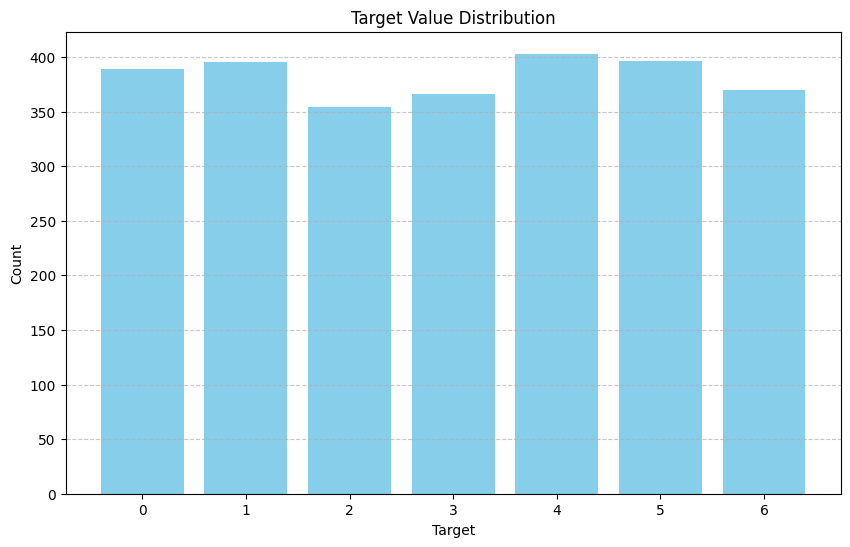

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# target 값의 분포 계산
target_counts = new_data['target'].value_counts().sort_index()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(target_counts.index, target_counts.values, color='skyblue')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Value Distribution')
plt.xticks(target_counts.index)  # x축의 라벨 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

0: 211
1: 219
2: 202
3: 219
4: 218
5: 220
6: 192

In [44]:
# filtered_0 = df[df['target'] == 0]
# print(len(filtered_0))
# filtered_0.head(20)

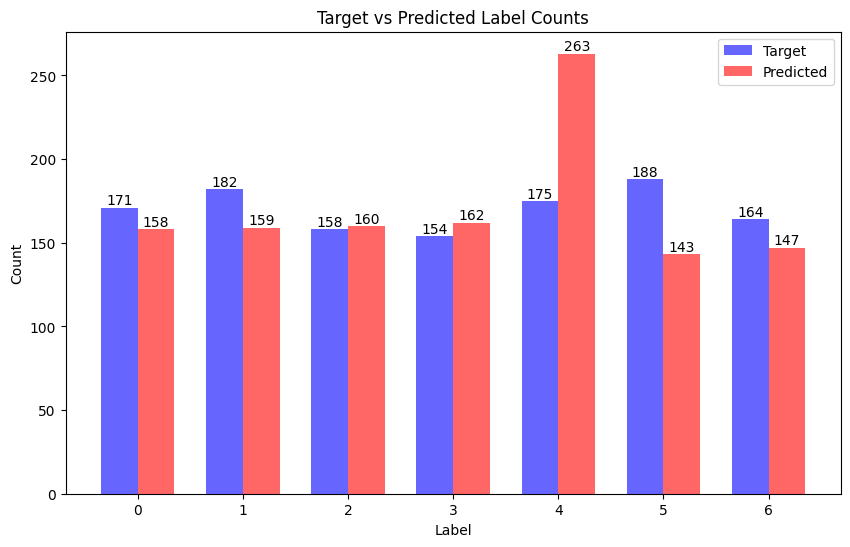

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# target과 predicted_label의 갯수 세기
target_counts = df['target'].value_counts().sort_index()
predicted_counts = df['predicted_label'].value_counts().sort_index()

# 두 개의 값이 존재하지 않는 인덱스도 포함하도록 모든 인덱스 만들기
all_indices = sorted(set(target_counts.index).union(set(predicted_counts.index)))

# target과 predicted_label의 갯수를 모든 인덱스에 맞춰서 재정렬
target_counts = target_counts.reindex(all_indices, fill_value=0)
predicted_counts = predicted_counts.reindex(all_indices, fill_value=0)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(all_indices))

# target과 predicted_label의 막대 그래프
bars1 = plt.bar(index, target_counts, width=bar_width, label='Target', color='b', alpha=0.6)
bars2 = plt.bar([i + bar_width for i in index], predicted_counts, width=bar_width, label='Predicted', color='r', alpha=0.6)

# 각 막대 위에 숫자 표시
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

# 그래프 설정
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Target vs Predicted Label Counts')
plt.xticks([i + bar_width / 2 for i in index], all_indices)
plt.legend()

# 그래프 출력
plt.show()

In [ ]:
filtered_0 = df[df['predicted_label'] == 0]
print(len(filtered_0))
filtered_0.head(10)

158


,ID,text,target,predicted_label
10,ynat-v1_train_00024,서울에 다시 오존주의보…도심·서북·동북권 발령종합,1,0
11,ynat-v1_train_00035,게시판 KBS 코로나가 바꾼 일상 대국민 영상 공모,0,0
14,ynat-v1_train_00040,피폭 노동자가 증언하는 후쿠시마 원전 은폐와 속임수,6,0
26,ynat-v1_train_00093,문대통령 호주 총리와 축구 평가전 1대1 무승부 축하,1,0
39,ynat-v1_train_00151,한국형 발사체 75t 엔진 첫 연소시험 성공,2,0
54,ynat-v1_train_00201,빛으로 작동하는 나노선 트랜지스터 개발 성공,4,0
67,ynat-v1_train_00232,충북 가마솥더위 지속…주말도 더워요,2,0
69,ynat-v1_train_00235,신간 답이 보이지 않는 상황을 견디는 힘,4,0
77,ynat-v1_train_00262,국립민속박물관 아카이브 만들기 특별전 개최,6,0
84,ynat-v1_train_00273,위안부 피해자 그림 선생님이 전하는 이야기,6,0


In [ ]:
filtered_1 = df[df['predicted_label'] == 1]
print(len(filtered_1))
filtered_1.head(10)

159


,ID,text,target,predicted_label
9,ynat-v1_train_00023,아시안게임 목소리 높인 박항서 베트남이 일본 못 이길...,6,1
13,ynat-v1_train_00038,마틴 우리카드 코치로 V리그 복귀…한국 좋아요,5,1
23,ynat-v1_train_00073,대한항공 인천∼바르셀로나 노선 첫 취항,1,1
29,ynat-v1_train_00104,승리에도 침통했던 박기원 감독 엔진을 끈 것 같다,0,1
51,ynat-v1_train_00189,400년 전 일본 건너간 조선 첫 여성도공 백파선,1,1
55,ynat-v1_train_00207,故문중원 기수 대책위 정부가 나서라…靑 인근까지 상여 행진,0,1
57,ynat-v1_train_00211,한국 남자농구도 월드컵 승전보…아시아 예선서 중국 제압,1,1
58,ynat-v1_train_00212,장애인 정책 발표하는 안철수,6,1
59,ynat-v1_train_00213,아시안게임 키르기스스탄전 앞둔 김학범 스스로 만든 가...,4,1
61,ynat-v1_train_00222,네덜란드 정부 보스니아 무슬림 학살사건에 10% 책임,4,1


In [ ]:
filtered_2 = df[df['predicted_label'] == 2]
print(len(filtered_2))
filtered_2.head(10)

160


,ID,text,target,predicted_label
3,ynat-v1_train_00009,듀얼심 아이폰 하반기 출시설 솔솔…알뜰폰 기대감,4,2
20,ynat-v1_train_00063,영상 선출부터 퇴장까지…나경원 원내대표 파란만장 1년,5,2
22,ynat-v1_train_00072,獨 反이스라엘 테러 팔레스타인인 강연 차단…비자도 취소,3,2
24,ynat-v1_train_00081,한산한 성산일출봉 주차장,3,2
27,ynat-v1_train_00099,北 무수단 발사 대기권 재진입 기술 확보 여부가 관건,1,2
34,ynat-v1_train_00143,지소미아 종료까지 8일…美 압박 속 고민 깊어지는 文대통령,4,2
35,ynat-v1_train_00144,호텔서 스타 셰프 음식 만난다…더플라자 레스토랑 4곳 오픈,4,2
40,ynat-v1_train_00162,北당대회 나흘만에 일부 외신 취재허용…김정은 위원장 취임 발표,6,2
45,ynat-v1_train_00175,북한 사이버 공격 집단 세계 은행들 상대 1천억 탈취종합,4,2
56,ynat-v1_train_00208,새누리 갈등 폭발한 상임 전국위·전국위는 어떤 기구,5,2
